# Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import importlib
from termcolor import colored, cprint
import warnings
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import TargetEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

## Funciones

In [2]:
sys.path.append('../src/')
import functions_rfc as fr
sys.path.remove('../src/')

### Constantes:
SEED=10

In [3]:
sys.path.append('../src/')
importlib.reload(fr)
sys.path.remove('../src/')

In [4]:
train = pd.read_csv('../data/raw/cell2celltrain.csv')
holdout = pd.read_csv('../data/raw/cell2cellholdout.csv')
display(train.head(), holdout.head())

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,SEAPOR503,2.0,2.0,361.0,62.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,No,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,PITHOM412,2.0,1.0,1504.0,40.0,42.0,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,MILMIL414,1.0,1.0,1812.0,26.0,26.0,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,No,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,PITHOM412,9.0,4.0,458.0,30.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,OKCTUL918,4.0,3.0,852.0,46.0,54.0,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,Yes,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000006,NaN,57.49,483.0,37.0,0.25,23.0,0.0,532.0,51.0,8.3,1.0,61.3,1.7,0.3,55.3,46.3,6.3,83.7,157.0,9.3,0.0,5.7,56,1,1,MILMIL414,7,6,240,30.0,0.0,No,No,Yes,Yes,Yes,Unknown,Yes,Yes,No,No,No,Yes,0,0,No,Yes,0,5,No,1,150,No,5-Low,Other,Other,No
1,3000018,NaN,55.23,570.0,72.0,0.00,0.0,0.0,38.0,0.0,9.7,0.7,77.0,8.7,0.0,106.3,14.7,0.7,97.3,90.3,10.3,0.0,0.0,57,1,1,NNYSYR315,6,4,434,56.0,0.0,No,No,Yes,No,No,Known,No,No,No,No,Yes,Yes,0,0,Yes,No,0,6,No,2,80,No,1-Highest,Other,Professional,No
2,3000034,NaN,97.34,1039.0,50.0,4.95,420.0,0.0,198.0,23.3,12.7,3.0,176.0,11.3,0.3,213.9,103.3,0.3,238.3,192.3,15.7,0.0,4.0,55,1,1,MILMIL414,3,3,700,38.0,24.0,No,No,No,No,No,Unknown,No,No,No,No,No,No,0,0,Yes,No,0,4,No,3,10,No,3-Good,Suburban,Crafts,Yes
3,3000070,NaN,35.59,153.0,30.0,0.00,16.0,0.0,30.0,7.3,2.0,0.7,17.3,0.0,0.0,33.1,8.0,4.7,48.3,7.0,2.7,0.0,0.3,59,3,2,SLCSLC801,6,5,48,46.0,0.0,Yes,No,Yes,Yes,Yes,Known,Yes,Yes,Yes,No,No,Yes,0,0,No,Yes,0,4,No,1,200,No,1-Highest,Other,Other,No
4,3000074,NaN,55.27,1213.0,50.0,0.74,0.0,1.3,169.0,1.0,2.7,6.0,43.7,4.3,0.0,490.1,50.7,8.3,189.3,105.0,8.7,0.0,4.3,52,1,1,OKCTUL918,4,4,408,58.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,No,Yes,0,3,No,0,10,No,1-Highest,Suburban,Other,No


In [5]:
train.shape

(51047, 58)

In [6]:
X = train.drop(columns='Churn', axis=1)
y = train['Churn'].map({'Yes': 1, 'No': 0})

In [7]:
display(X.head(), y.head())

,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,SEAPOR503,2.0,2.0,361.0,62.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,No,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,PITHOM412,2.0,1.0,1504.0,40.0,42.0,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,MILMIL414,1.0,1.0,1812.0,26.0,26.0,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,No,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,PITHOM412,9.0,4.0,458.0,30.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,OKCTUL918,4.0,3.0,852.0,46.0,54.0,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,Yes,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


0    1
1    1
2    0
3    0
4    1
Name: Churn, dtype: int64

In [8]:
def Preprocessing(df, cat_transf='mix', scale=True, cat_vars=None, num_vars=None, bool_vars=None, vars_ord=[], vars_oh=[], not_scale=[], nulls_strategy='median', show_info=False):
    """
    ----------------------------------------------------------------------------------------------------------
    Preprocessing function:
    ----------------------------------------------------------------------------------------------------------
    - Description: Function that receives a dataframe and performs the preprocessing based on the parameters
                that the user chooses.
    - Inputs:
        - \033[1mdf:\033[0m dataframe to be preprocessed.
        - \033[1mcat_transf:\033[0m type of transformation for categorical variables. It can be 'ordinal',
        'onehot', 'mean' or 'mix'.
        - \033[1mscale:\033[0m boolean that indicates if the numeric variables should be scaled.
        - \033[1mcat_vars:\033[0m list of categorical variables to be transformed.
        - \033[1mnum_vars:\033[0m list of numeric variables to be transformed.
        - \033[1mbool_vars:\033[0m list of boolean variables to be transformed.
        - \033[1mvars_ord:\033[0m list of categorical variables to be transformed using ordinal encoding.
        - \033[1mvars_oh:\033[0m list of categorical variables to be transformed using onehot encoding.
        - \033[1mnot_scale:\033[0m list of numeric variables that should not be scaled.
        - \033[1mnulls_strategy:\033[0m strategy to fill null values in numeric variables. It can be 'mean',
        'median' or 'most_frequent'.
    
    - Output: preprocessor object that can be used in a pipeline.
    """

    # Defining transformers

    # Numeric transformer
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy=nulls_strategy))
        ,('scaler', StandardScaler() if scale else 'passthrough')])
    
    # Categoircal transformers
    ordinal_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing'))
        ,('ordinal', OrdinalEncoder())])
    onehot_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing'))
        ,('onehot', OneHotEncoder(sparse_output=False))])
    mean_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing'))
        ,('mean_encoder', TargetEncoder())])
    

    # Defining types of features
    df_bool, df_cat, df_num = fr.tipos_vars(df,False)

    if num_vars==None:
        num_vars = (df
                    .select_dtypes(include=['int64', 'float64'])
                    .drop(not_scale, axis=1)
                    .drop(df_bool, axis=1)
                    .columns)
    else:
        num_vars = np.array(num_vars)[~np.isin(num_vars, not_scale)]
    
    if bool_vars==None:
        bool_vars = df[df_bool].columns
    
    if cat_vars==None:
        cat_vars = df.select_dtypes(include=['object','string','category']).columns.values
    else:
        cat_vars = np.array(cat_vars)

    # Defining type of transformation for categorical variables
    if cat_transf=='ordinal':
        vars_ord = cat_vars.copy()
        cat_vars = []
    elif cat_transf=='onehot':
        vars_oh = cat_vars.copy()
        cat_vars = []
    elif cat_transf=='mix' and (vars_ord!=[] or vars_oh!=[]):
        cat_vars = cat_vars[~np.isin(cat_vars, [vars_ord + vars_oh])]
    elif cat_transf not in ['ordinal','onehot','mix','mean']:
        print('Error: cat_transf debe ser uno de los siguientes valores: "ordinal", "onehot", "mean" o "mix"')
        return None

    # Defining preprocessing pipeline
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, num_vars),
            ('ordinal', ordinal_transformer, vars_ord),
            ('onehot', onehot_transformer, vars_oh),
            ('mean', mean_transformer, cat_vars),
            ('bool', ordinal_transformer, bool_vars)
            ]
        ,remainder='passthrough'
        ,verbose_feature_names_out=False).set_output(transform="pandas")
    
    if show_info:
        print(f'''Prprocessing pipeline defined with the following parameters:
        Mean encoding: {cat_vars}
        Numerical transformation (scaling={scale} input strategy={nulls_strategy}): {num_vars}
        Booleans encoding (ordinal 0-1): {bool_vars}
        Ordinal encoding: {vars_ord}
        One-Hot encoding: {vars_oh}''')

    return preprocessor

In [9]:
help(Preprocessing)

Help on function Preprocessing in module __main__:

Preprocessing(df, cat_transf='mix', scale=True, cat_vars=None, num_vars=None, bool_vars=None, vars_ord=[], vars_oh=[], not_scale=[], nulls_strategy='median', show_info=False)
    ----------------------------------------------------------------------------------------------------------
    Preprocessing function:
    ----------------------------------------------------------------------------------------------------------
    - Description: Function that receives a dataframe and performs the preprocessing based on the parameters
                that the user chooses.
    - Inputs:
        - df: dataframe to be preprocessed.
        - cat_transf: type of transformation for categorical variables. It can be 'ordinal',
        'onehot', 'mean' or 'mix'.
        - scale: boolean that indicates if the numeric variables should be scaled.
        - cat_vars: list of categorical variables to be transformed.
        - num_vars: list of numeric v

In [10]:
def feature_selection(df, add=[]):
    """
    ----------------------------------------------------------------------------------------------------------
    feature_selection function:
    ----------------------------------------------------------------------------------------------------------
    - Funcionamiento: Function that receives a DataFrame and an optional of extra columns to eliminate.
                    Returns a DataFrame with the columns of the feature selection eliminated.
    - Inputs:
        - df: DataFrame to be reduced.
        - add: list of extra columns to be eliminated.
    - Return: DataFrame with the columns of the feature selection eliminated.
    """
    drop = ['CustomerID']
    if add != []:
        drop+=add
    df_new = df.drop(drop, axis=1) #'device_fraud_count',
    return df_new

In [11]:
bools, cats, nums = fr.tipos_vars(X)

(numeric) - CustomerID : Range = [3000002.00 to 3399994.00], Mean = 3201956.88
(numeric) - MonthlyRevenue : Range = [-6.17 to 1223.38], Mean = 58.83
(numeric) - MonthlyMinutes : Range = [0.00 to 7359.00], Mean = 525.65
(numeric) - TotalRecurringCharge : Range = [-11.00 to 400.00], Mean = 46.83
(numeric) - DirectorAssistedCalls : Range = [0.00 to 159.39], Mean = 0.90
(numeric) - OverageMinutes : Range = [0.00 to 4321.00], Mean = 40.03
(numeric) - RoamingCalls : Range = [0.00 to 1112.40], Mean = 1.24
(numeric) - PercChangeMinutes : Range = [-3875.00 to 5192.00], Mean = -11.55
(numeric) - PercChangeRevenues : Range = [-1107.70 to 2483.50], Mean = -1.19
(numeric) - DroppedCalls : Range = [0.00 to 221.70], Mean = 6.01
(numeric) - BlockedCalls : Range = [0.00 to 384.30], Mean = 4.09
(numeric) - UnansweredCalls : Range = [0.00 to 848.70], Mean = 28.29
(numeric) - CustomerCareCalls : Range = [0.00 to 327.30], Mean = 1.87
(numeric) - ThreewayCalls : Range = [0.00 to 66.00], Mean = 0.30
(numeric

In [12]:
X.HandsetPrice = X.HandsetPrice.str.replace('Unknown', '-99').astype(float)
X.HandsetPrice.value_counts(normalize=True)

HandsetPrice
-99.0     0.567751
 30.0     0.143554
 150.0    0.080612
 130.0    0.041237
 80.0     0.038396
 10.0     0.037769
 60.0     0.034791
 200.0    0.024801
 100.0    0.024193
 40.0     0.004878
 400.0    0.000901
 250.0    0.000392
 300.0    0.000255
 180.0    0.000196
 500.0    0.000157
 240.0    0.000118
Name: proportion, dtype: float64

In [13]:
cat_no_cat = ['CallForwardingCalls'
            ,'UniqueSubs'
            ,'ActiveSubs'
            ,'Handsets'
            ,'HandsetModels'
            ,'RetentionCalls'
            ,'RetentionOffersAccepted'
            ,'ReferralsMadeBySubscriber'
            ,'AdjustmentsToCreditRating'
            ,'HandsetPrice']

for i in cat_no_cat:
    cats.remove(i)
    nums.append(i)

In [14]:
train.Homeownership.value_counts(normalize=True)

Homeownership
Known      0.665798
Unknown    0.334202
Name: proportion, dtype: float64

In [15]:
vars_ord = ['CreditRating','IncomeGroup']
vars_oh = ['PrizmCode','Occupation','MaritalStatus']
X['Homeownership'] = X['Homeownership'].map({'Known': 1, 'Unknown': 0})
X.Homeownership.value_counts(normalize=True)

Homeownership
1    0.665798
0    0.334202
Name: proportion, dtype: float64

In [16]:
preprocessor = Preprocessing(X
                            ,cat_transf='mix'
                            ,scale=True
                            ,cat_vars=cats
                            ,num_vars=nums
                            ,bool_vars=bools
                            ,nulls_strategy='median'
                            ,vars_ord=vars_ord
                            ,vars_oh=vars_oh
                            ,show_info=True
                            ,not_scale=['RetentionCalls'])
X_t = feature_selection(preprocessor.fit_transform(X, y))
X_t.head()

Prprocessing pipeline defined with the following parameters:
        Mean encoding: ['ServiceArea']
        Numerical transformation (scaling=True input strategy=median): ['CustomerID' 'MonthlyRevenue' 'MonthlyMinutes' 'TotalRecurringCharge'
 'DirectorAssistedCalls' 'OverageMinutes' 'RoamingCalls'
 'PercChangeMinutes' 'PercChangeRevenues' 'DroppedCalls' 'BlockedCalls'
 'UnansweredCalls' 'CustomerCareCalls' 'ThreewayCalls' 'ReceivedCalls'
 'OutboundCalls' 'InboundCalls' 'PeakCallsInOut' 'OffPeakCallsInOut'
 'DroppedBlockedCalls' 'CallWaitingCalls' 'MonthsInService'
 'CurrentEquipmentDays' 'AgeHH1' 'AgeHH2' 'CallForwardingCalls'
 'UniqueSubs' 'ActiveSubs' 'Handsets' 'HandsetModels'
 'RetentionOffersAccepted' 'ReferralsMadeBySubscriber'
 'AdjustmentsToCreditRating' 'HandsetPrice']
        Booleans encoding (ordinal 0-1): ['ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers', 'OptOutMailings', 'NonUS

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallWaitingCalls,MonthsInService,CurrentEquipmentDays,AgeHH1,AgeHH2,CallForwardingCalls,UniqueSubs,ActiveSubs,Handsets,HandsetModels,RetentionOffersAccepted,ReferralsMadeBySubscriber,AdjustmentsToCreditRating,HandsetPrice,CreditRating,IncomeGroup,PrizmCode_Other,PrizmCode_Rural,PrizmCode_Suburban,PrizmCode_Town,Occupation_Clerical,Occupation_Crafts,Occupation_Homemaker,Occupation_Other,Occupation_Professional,Occupation_Retired,Occupation_Self,Occupation_Student,MaritalStatus_No,MaritalStatus_Unknown,MaritalStatus_Yes,ServiceArea,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,NewCellphoneUser,NotNewCellphoneUser,OwnsMotorcycle,MadeCallToRetentionTeam,RetentionCalls
0,-0.783096,-0.578622,-1.042504,-0.289052,-0.41379,-0.125718,-0.567059,-0.451775,-0.587303,-0.309284,-0.565621,-0.366752,-0.255797,-0.105716,-0.720778,-0.490714,-0.310154,-0.470619,-0.569459,-0.275825,4.310567,-0.077010,1.395945,-0.869616,-0.020663,0.382421,-0.524583,0.146016,0.487086,-0.1283,-0.169283,-0.140707,0.516028,0.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.384363,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1
1,-0.940828,-0.973610,-1.252478,-0.401392,-0.41379,-0.125718,0.029233,0.030066,-0.631532,-0.373230,-0.658224,-0.366752,-0.255797,-0.689555,-0.720778,-0.490714,-0.815173,-0.718593,-0.633746,-0.329540,4.004446,4.426588,0.391631,0.889077,-0.020663,-0.434992,-0.524583,0.146016,-0.616767,-0.1283,-0.169283,-0.140707,0.516028,3.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.272173,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0
2,-0.468083,-0.977390,-0.370584,-0.401392,-0.41379,-0.125718,0.037028,0.030066,-0.664703,-0.373230,-0.727676,-0.366752,-0.255797,-0.687153,-0.712257,-0.490714,-0.850429,-0.689483,-0.653032,-0.329540,4.208527,5.640155,-0.247479,0.219099,-0.020663,-0.434992,-0.524583,-0.605213,-0.616767,-0.1283,-0.169283,-0.140707,-0.797977,2.0,6.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.229127,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0
3,0.528260,1.487037,1.183229,0.155811,-0.41379,-0.125718,0.656704,0.235483,5.085049,0.330172,1.227267,0.477033,0.856964,0.513561,9.796479,8.329790,4.432265,2.544956,3.184929,3.734865,4.106486,0.305185,-0.064876,-0.869616,-0.020663,0.382421,0.955867,5.404621,2.694792,-0.1283,-0.169283,-0.140707,0.312307,3.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.309701,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0
4,-0.937453,-0.992509,-1.252478,-0.401392,-0.41379,-0.125718,0.044823,0.024994,-0.664703,-0.373230,-0.727676,-0.366752,-0.255797,-0.689555,-0.720778,-0.490714,-0.862816,-0.729374,-0.653032,-0.329540,3.494244,1.857607,0.665534,1.391560,-0.020663,0.382421,0.955867,1.648475,1.590939,-0.1283,-0.169283,2.469282,0.312307,0.0,9.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.244878,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0


In [17]:
X.head()

,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,SEAPOR503,2.0,2.0,361.0,62.0,0.0,No,No,Yes,No,No,1,Yes,Yes,No,No,Yes,Yes,1,0,No,No,0,4,No,0,30.0,Yes,1-Highest,Suburban,Professional,No
1,3000010,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,PITHOM412,2.0,1.0,1504.0,40.0,42.0,Yes,No,No,No,No,1,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,30.0,No,4-Medium,Suburban,Professional,Yes
2,3000014,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,MILMIL414,1.0,1.0,1812.0,26.0,26.0,Yes,No,No,No,No,0,No,No,No,No,No,Yes,0,0,Yes,No,0,6,No,0,-99.0,No,3-Good,Town,Crafts,Yes
3,3000022,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,PITHOM412,9.0,4.0,458.0,30.0,0.0,No,No,Yes,No,No,1,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,10.0,No,4-Medium,Other,Other,No
4,3000026,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,OKCTUL918,4.0,3.0,852.0,46.0,54.0,No,No,No,No,No,1,Yes,Yes,No,No,Yes,Yes,0,0,No,Yes,0,9,No,1,10.0,No,1-Highest,Other,Professional,Yes


In [18]:
X_t['-----------Random_control-----------'] = np.random.randint(1,10000,X.shape[0])

In [19]:
%%time
clf = RandomForestClassifier(max_depth=6, random_state=SEED)
clf.fit(X_t, y)

CPU times: total: 4.53 s
Wall time: 6.14 s


RandomForestClassifier(max_depth=6, random_state=10)

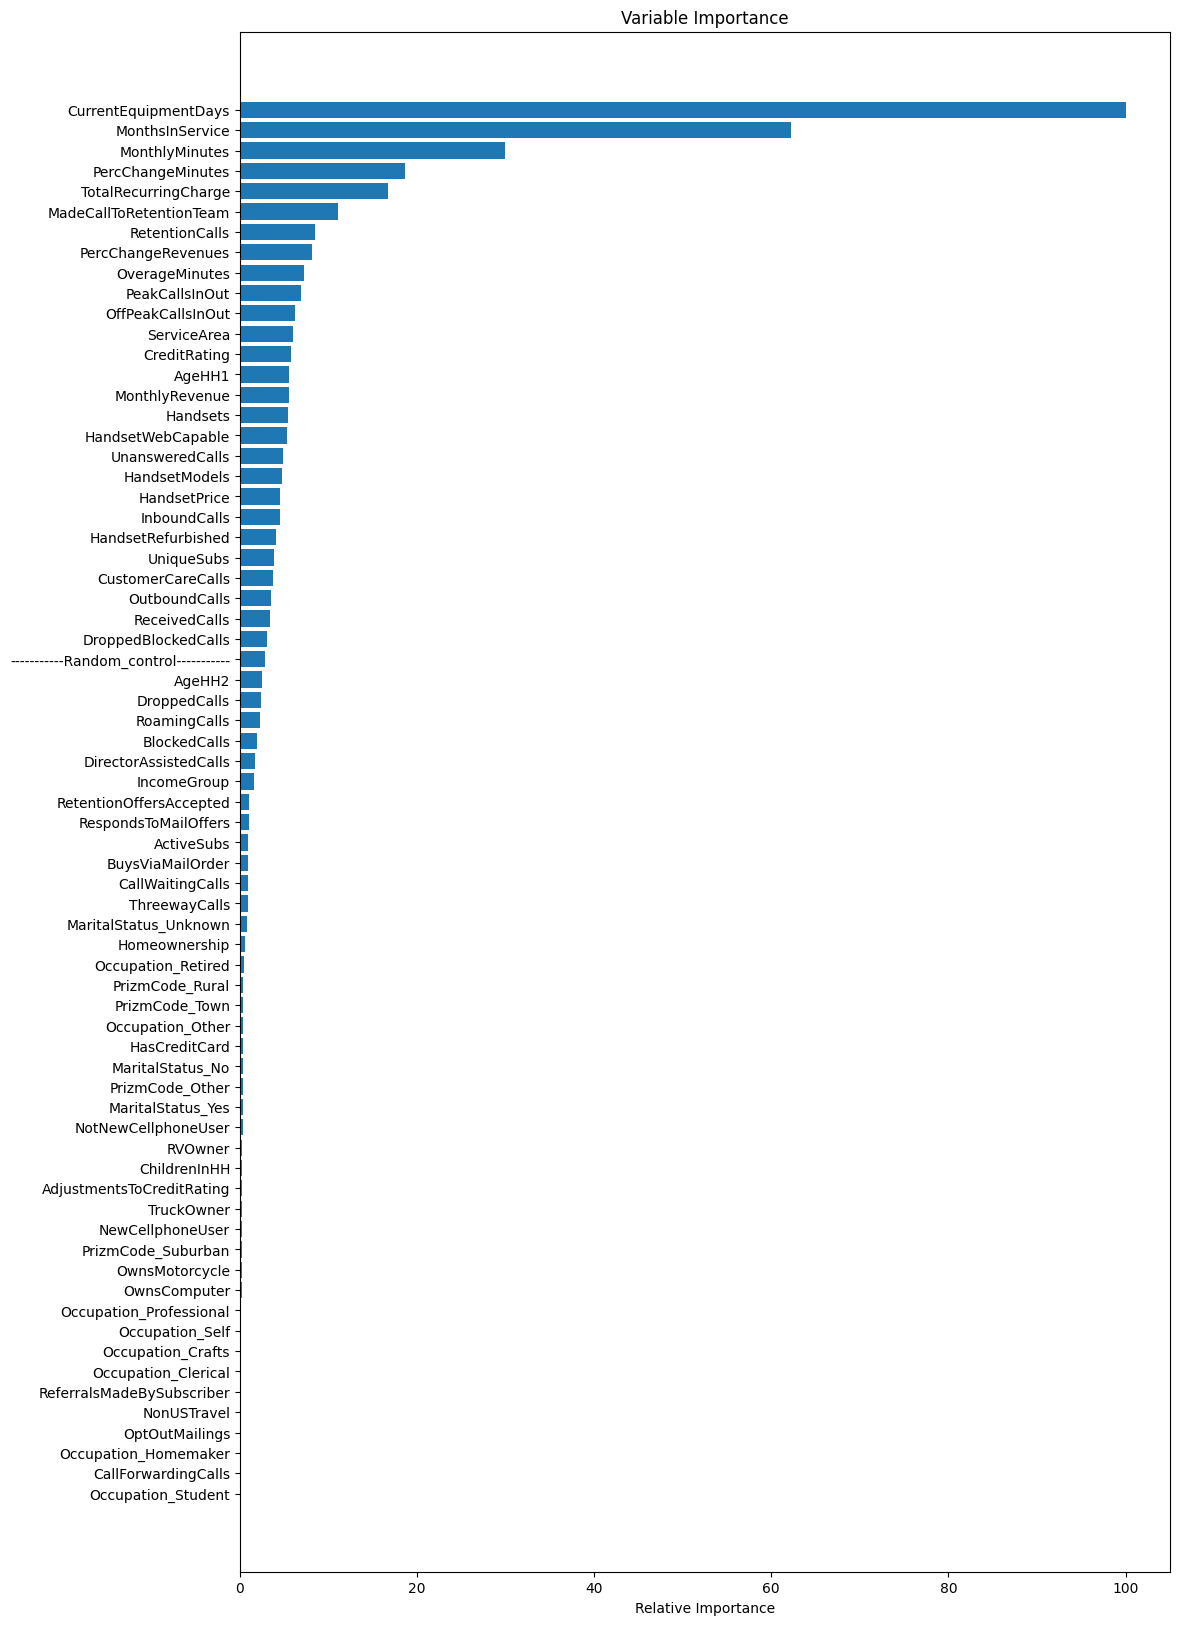

In [20]:
feature_importance = clf.feature_importances_ 
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
plt.figure(figsize=(12, 20))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_t.keys()[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [23]:
for id,fi in zip(X_t.keys()[sorted_idx], sorted(clf.feature_importances_)):
    print(f'{id}: {fi}')

Occupation_Homemaker: 0.00039571890471219436
Occupation_Student: 0.0006306899315225845
CallForwardingCalls: 0.000668308562714276
Occupation_Self: 0.0008224270439261494
OwnsMotorcycle: 0.0009213849353718363
Occupation_Clerical: 0.0009994635907658333
OptOutMailings: 0.0010231203850873125
Occupation_Crafts: 0.001057414474194662
NonUSTravel: 0.0013098306363739445
Occupation_Retired: 0.0014612548065061255
ReferralsMadeBySubscriber: 0.0015994013709017018
RVOwner: 0.0017829271030111802
PrizmCode_Rural: 0.0018509314942998477
OwnsComputer: 0.0018862381195959691
AdjustmentsToCreditRating: 0.0019430272504986706
Occupation_Professional: 0.002088752531985746
HasCreditCard: 0.002124441231750872
MaritalStatus_Yes: 0.00220353125084537
TruckOwner: 0.002230226162767096
NotNewCellphoneUser: 0.0023116619954869056
RetentionOffersAccepted: 0.002348449288487431
Occupation_Other: 0.0024331765645539687
NewCellphoneUser: 0.0024354167428492107
PrizmCode_Other: 0.0025963626464764722
Homeownership: 0.0026254244639

In [24]:
# to pandas df:
df_importance = pd.DataFrame({'feature':X_t.keys()[sorted_idx], 'importance':sorted(clf.feature_importances_)}).sort_values(by='importance', ascending=False)
df_importance.head(20)

,feature,importance
68,CurrentEquipmentDays,0.127730
67,MonthsInService,0.105588
66,MonthlyMinutes,0.060408
65,PercChangeMinutes,0.055387
64,TotalRecurringCharge,0.036424
63,PercChangeRevenues,0.035757
62,ServiceArea,0.031723
61,MonthlyRevenue,0.031379
60,PeakCallsInOut,0.025709
59,-----------Random_control-----------,0.025492


In [25]:
threshold = 0.01
df_importance.style.background_gradient(cmap='YlOrRd', subset=['importance'])

,feature,importance
68,CurrentEquipmentDays,0.127730
67,MonthsInService,0.105588
66,MonthlyMinutes,0.060408
65,PercChangeMinutes,0.055387
64,TotalRecurringCharge,0.036424
63,PercChangeRevenues,0.035757
62,ServiceArea,0.031723
61,MonthlyRevenue,0.031379
60,PeakCallsInOut,0.025709
59,-----------Random_control-----------,0.025492


In [26]:
threshold = 0.01
df_importance_filtered = df_importance[df_importance.importance>threshold]
df_importance_filtered.shape

(32, 2)

In [27]:
df_importance_filtered.feature.values

array(['CurrentEquipmentDays', 'MonthsInService', 'MonthlyMinutes',
       'PercChangeMinutes', 'TotalRecurringCharge', 'PercChangeRevenues',
       'ServiceArea', 'MonthlyRevenue', 'PeakCallsInOut',
       '-----------Random_control-----------', 'OverageMinutes',
       'OffPeakCallsInOut', 'AgeHH1', 'UnansweredCalls', 'ReceivedCalls',
       'DroppedBlockedCalls', 'OutboundCalls', 'CreditRating',
       'DroppedCalls', 'InboundCalls', 'BlockedCalls',
       'CustomerCareCalls', 'RoamingCalls', 'HandsetPrice',
       'MadeCallToRetentionTeam', 'AgeHH2', 'RetentionCalls',
       'UniqueSubs', 'DirectorAssistedCalls', 'Handsets', 'IncomeGroup',
       'HandsetModels'], dtype=object)

In [28]:
X_t_f = X_t[df_importance_filtered.feature].drop(columns='-----------Random_control-----------', axis=1)
display(X_t_f.head(), X_t_f.shape)

,CurrentEquipmentDays,MonthsInService,MonthlyMinutes,PercChangeMinutes,TotalRecurringCharge,PercChangeRevenues,ServiceArea,MonthlyRevenue,PeakCallsInOut,OverageMinutes,OffPeakCallsInOut,AgeHH1,UnansweredCalls,ReceivedCalls,DroppedBlockedCalls,OutboundCalls,CreditRating,DroppedCalls,InboundCalls,BlockedCalls,CustomerCareCalls,RoamingCalls,HandsetPrice,MadeCallToRetentionTeam,AgeHH2,RetentionCalls,UniqueSubs,DirectorAssistedCalls,Handsets,IncomeGroup,HandsetModels
0,-0.077010,4.310567,-0.578622,-0.567059,-1.042504,-0.451775,0.342835,-0.783096,-0.310154,-0.41379,-0.470619,1.395945,-0.565621,-0.105716,-0.569459,-0.720778,0.0,-0.587303,-0.490714,-0.309284,-0.366752,-0.125718,0.516028,1.0,-0.869616,1,0.382421,-0.289052,0.146016,4.0,0.487086
1,4.426588,4.004446,-0.973610,0.029233,-1.252478,0.030066,0.302712,-0.940828,-0.815173,-0.41379,-0.718593,0.391631,-0.658224,-0.689555,-0.633746,-0.720778,3.0,-0.631532,-0.490714,-0.373230,-0.366752,-0.125718,0.516028,0.0,0.889077,0,-0.434992,-0.401392,0.146016,5.0,-0.616767
2,5.640155,4.208527,-0.977390,0.037028,-0.370584,0.030066,0.227454,-0.468083,-0.850429,-0.41379,-0.689483,-0.247479,-0.727676,-0.687153,-0.653032,-0.712257,2.0,-0.664703,-0.490714,-0.373230,-0.366752,-0.125718,-0.797977,0.0,0.219099,0,-0.434992,-0.401392,-0.605213,6.0,-0.616767
3,0.305185,4.106486,1.487037,0.656704,1.183229,0.235483,0.284697,0.528260,4.432265,-0.41379,2.544956,-0.064876,1.227267,0.513561,3.184929,9.796479,3.0,5.085049,8.329790,0.330172,0.477033,-0.125718,0.312307,0.0,-0.869616,0,0.382421,0.155811,5.404621,6.0,2.694792
4,1.857607,3.494244,-0.992509,0.044823,-1.252478,0.024994,0.242210,-0.937453,-0.862816,-0.41379,-0.729374,0.665534,-0.727676,-0.689555,-0.653032,-0.720778,0.0,-0.664703,-0.490714,-0.373230,-0.366752,-0.125718,0.312307,0.0,1.391560,0,0.382421,-0.401392,1.648475,9.0,1.590939


(51047, 31)

In [29]:
deleted_features = X.columns.values[~np.isin(X.columns.values, df_importance_filtered.feature.values)]
deleted_features

array(['CustomerID', 'ThreewayCalls', 'CallForwardingCalls',
       'CallWaitingCalls', 'ActiveSubs', 'ChildrenInHH',
       'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner',
       'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers',
       'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard',
       'RetentionOffersAccepted', 'NewCellphoneUser',
       'NotNewCellphoneUser', 'ReferralsMadeBySubscriber',
       'OwnsMotorcycle', 'AdjustmentsToCreditRating', 'PrizmCode',
       'Occupation', 'MaritalStatus'], dtype=object)

In [30]:
corr = X_t_f.corr()

In [31]:
help(fr.plot_corr)

Help on function plot_corr in module functions_rfc:

plot_corr(corr, title='Matriz de correlaciones', figsize=(14, 8), target_text=False, annot_floor=0.4, annot_all=False, cmap='icefire', vmin=-1, vmax=1, fmt='.1f')
    ----------------------------------------------------------------------------------------------------------
    Función plot_corr:
    ----------------------------------------------------------------------------------------------------------
    - Funcionamiento:
        La función recibe una matriz de correlaciones y genera un gráfico tipo heatmap en base a ella.
        Se pueden determinar el título, tamaño del gráfico, y que cuadrantes tengan o no el valor de la
        correlación.
    - Inputs:
        - corr: Dataframe de la matriz de correlaciones
        - title: Título elegido. Por defecto será 'Matriz de correlaciones'
        - figsize: Tamaño del gráfico
        - target_text: Se debe activar si se desean mostrar todos los valores en los cuadrantes de la últ

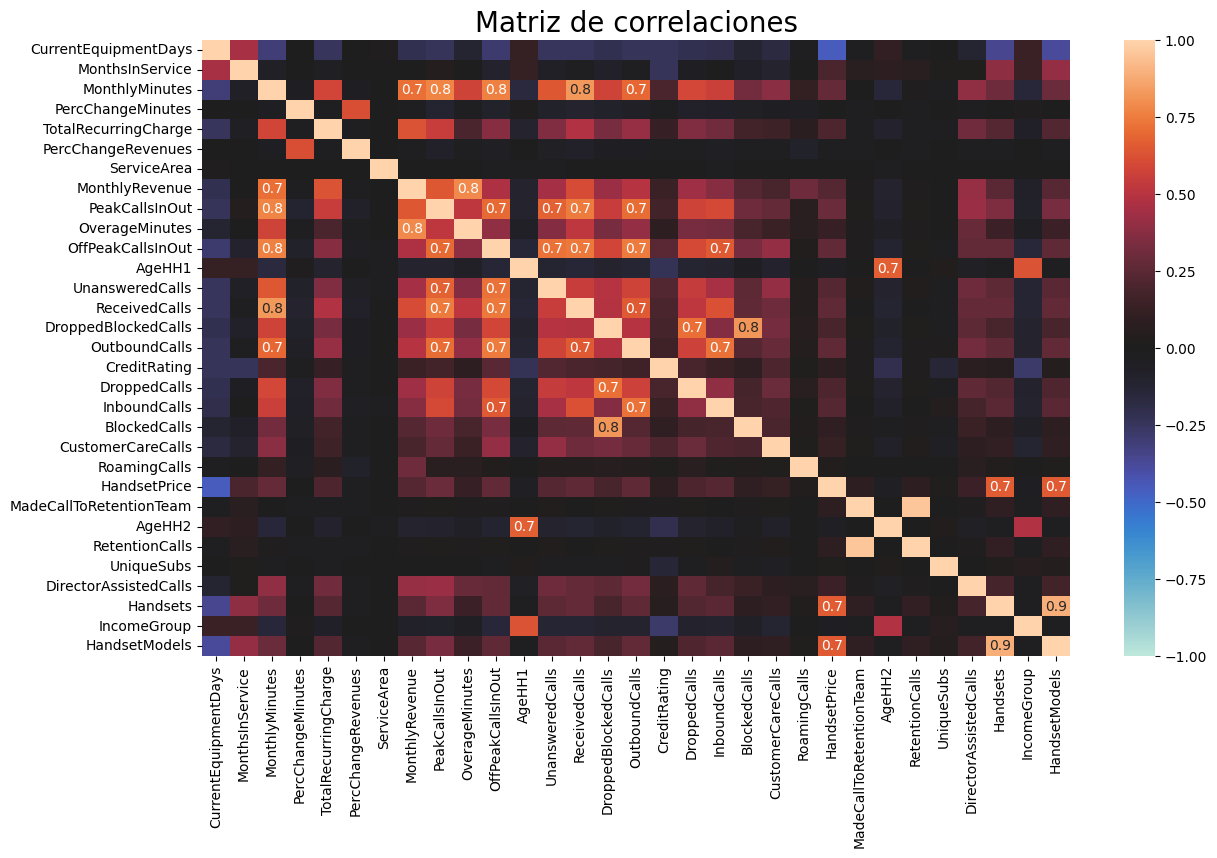

In [32]:
fr.plot_corr(corr, annot_floor=0.7)

In [33]:
high_corr = corr.copy()
high_corr.loc[:,:] = np.tril(high_corr, k=-1) # mantengo sólo una parte de las dos
high_corr = high_corr.stack().to_frame('correlation').reset_index().sort_values(by='correlation', ascending=False)
high_corr[(high_corr['correlation']>=0.7) | (high_corr['correlation']<=-0.7)].style.background_gradient(cmap='coolwarm', vmin=-1, vmax=1)

,level_0,level_1,correlation
798,RetentionCalls,MadeCallToRetentionTeam,0.957656
958,HandsetModels,Handsets,0.887839
405,ReceivedCalls,MonthlyMinutes,0.828031
603,BlockedCalls,DroppedBlockedCalls,0.816328
286,OverageMinutes,MonthlyRevenue,0.787865
250,PeakCallsInOut,MonthlyMinutes,0.770326
312,OffPeakCallsInOut,MonthlyMinutes,0.763910
411,ReceivedCalls,PeakCallsInOut,0.746892
475,OutboundCalls,OffPeakCallsInOut,0.742311
413,ReceivedCalls,OffPeakCallsInOut,0.738185


In [34]:
q_corrs = []
vars_high_corr = []
for i in high_corr.level_0.unique():
    vars_high_corr.append(i)
    q_corrs.append((high_corr[(high_corr.level_0 == i) & ((high_corr.correlation > 0.7) | (high_corr.correlation < (-0.7)))].shape[0]\
                    + high_corr[(high_corr.level_1 == i) & ((high_corr.correlation > 0.7) | (high_corr.correlation < (-0.7)))].shape[0]))

pd.DataFrame({'variable':vars_high_corr, 'q_corrs':q_corrs}).sort_values(by='q_corrs', ascending=False).query('q_corrs>0')

,variable,q_corrs
30,MonthlyMinutes,4
6,OffPeakCallsInOut,4
2,ReceivedCalls,3
5,PeakCallsInOut,3
7,OutboundCalls,3
11,MonthlyRevenue,2
16,DroppedBlockedCalls,2
25,MadeCallToRetentionTeam,1
1,HandsetModels,1
13,Handsets,1


In [35]:
X_t_f.head()

,CurrentEquipmentDays,MonthsInService,MonthlyMinutes,PercChangeMinutes,TotalRecurringCharge,PercChangeRevenues,ServiceArea,MonthlyRevenue,PeakCallsInOut,OverageMinutes,OffPeakCallsInOut,AgeHH1,UnansweredCalls,ReceivedCalls,DroppedBlockedCalls,OutboundCalls,CreditRating,DroppedCalls,InboundCalls,BlockedCalls,CustomerCareCalls,RoamingCalls,HandsetPrice,MadeCallToRetentionTeam,AgeHH2,RetentionCalls,UniqueSubs,DirectorAssistedCalls,Handsets,IncomeGroup,HandsetModels
0,-0.077010,4.310567,-0.578622,-0.567059,-1.042504,-0.451775,0.342835,-0.783096,-0.310154,-0.41379,-0.470619,1.395945,-0.565621,-0.105716,-0.569459,-0.720778,0.0,-0.587303,-0.490714,-0.309284,-0.366752,-0.125718,0.516028,1.0,-0.869616,1,0.382421,-0.289052,0.146016,4.0,0.487086
1,4.426588,4.004446,-0.973610,0.029233,-1.252478,0.030066,0.302712,-0.940828,-0.815173,-0.41379,-0.718593,0.391631,-0.658224,-0.689555,-0.633746,-0.720778,3.0,-0.631532,-0.490714,-0.373230,-0.366752,-0.125718,0.516028,0.0,0.889077,0,-0.434992,-0.401392,0.146016,5.0,-0.616767
2,5.640155,4.208527,-0.977390,0.037028,-0.370584,0.030066,0.227454,-0.468083,-0.850429,-0.41379,-0.689483,-0.247479,-0.727676,-0.687153,-0.653032,-0.712257,2.0,-0.664703,-0.490714,-0.373230,-0.366752,-0.125718,-0.797977,0.0,0.219099,0,-0.434992,-0.401392,-0.605213,6.0,-0.616767
3,0.305185,4.106486,1.487037,0.656704,1.183229,0.235483,0.284697,0.528260,4.432265,-0.41379,2.544956,-0.064876,1.227267,0.513561,3.184929,9.796479,3.0,5.085049,8.329790,0.330172,0.477033,-0.125718,0.312307,0.0,-0.869616,0,0.382421,0.155811,5.404621,6.0,2.694792
4,1.857607,3.494244,-0.992509,0.044823,-1.252478,0.024994,0.242210,-0.937453,-0.862816,-0.41379,-0.729374,0.665534,-0.727676,-0.689555,-0.653032,-0.720778,0.0,-0.664703,-0.490714,-0.373230,-0.366752,-0.125718,0.312307,0.0,1.391560,0,0.382421,-0.401392,1.648475,9.0,1.590939


In [36]:
X_t_f2 = X_t_f.drop(columns=['HandsetModels','DroppedCalls','BlockedCalls','ReceivedCalls', 'OffPeakCallsInOut'], axis=1)

Va a haber que hacer un **feature engineering** interesante, sobre todo para poder solventar las altas correlaciones, en su mayoría entre variables de llamadas. Alomejor con porcentaje de cada tipo de llamadas el dato es mejor que el valor absoluto

# Clusterización

Cluster

* Kmeans
* DBScan
* Kmodes
* Etc...



# Causal Analysis

### CausalInference

In [37]:
df = pd.concat([X_t_f, y], axis=1)

In [38]:
from causalinference import CausalModel

In [39]:
# we use the CausalModel method from the causalinference package

causal = CausalModel(
    Y=df['Churn'].values, 
    D=df['MadeCallToRetentionTeam'].values, 
    X=df.drop(['MadeCallToRetentionTeam','Churn'],axis=1).values)

causal.est_via_ols(adj=1)
# adj=1 corresponds to the simplicity of the model we entered
# This is called a "constant treatment effect"

print(causal.estimates)


Treatment Effect Estimates: OLS

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE      0.137      0.041      3.373      0.001      0.057      0.217



c:\Users\rodri\anaconda3\envs\practica0\lib\site-packages\causalinference\estimators\ols.py:21: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  olscoef = np.linalg.lstsq(Z, Y)[0]


In [37]:
import causalnex
from causalnex.structure.notears import from_pandas
from causalnex.structure import StructureModel
from causalnex.network import BayesianNetwork
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE
import pickle

In [59]:
%%time
sm = from_pandas(df)
#sm = pickle.load(open('../models/sm.pkl', 'rb'))

CPU times: total: 30min 36s
Wall time: 29min 46s


In [57]:
sm

In [52]:
viz = plot_structure(
    sm,
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK,
)

viz.toggle_physics(False)

In [41]:
from IPython.display import Image, IFrame
import pyvis

In [58]:
viz.save_graph("../images/mi_grafico.html")

In [53]:
sm.remove_edges_below_threshold(0.1)
viz = plot_structure(
    sm,
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK,
)

In [54]:
viz.save_graph("../images/mi_grafico.html")

In [46]:
pd.concat([X_t_f.ServiceArea, y], axis=1).corr()

,ServiceArea,Churn
ServiceArea,1.00000,0.02774
Churn,0.02774,1.00000


In [48]:
def plot_save(sm, path):
    viz = plot_structure(
        sm,
        all_node_attributes=NODE_STYLE.WEAK,
        all_edge_attributes=EDGE_STYLE.WEAK,
    )
    viz.save_graph(path)

In [49]:
# Domain Knowledge

sm.add_edge('RetentionCalls', 'Churn')
plot_save(sm, '../images/mi_grafico.html')

# DoWhy

In [40]:
import dowhy
from dowhy import CausalModel
import graphviz
import networkx as nx
from causallearn.search.ConstraintBased.PC import pc

np.set_printoptions(precision=3, suppress=True)
np.random.seed(0)

In [41]:
def make_graph(adjacency_matrix, labels=None):
    idx = np.abs(adjacency_matrix) > 0.1
    dirs = np.where(idx)
    d = graphviz.Digraph(engine='dot')
    names = labels if labels else [f'x{i}' for i in range(len(adjacency_matrix))]
    for name in names:
        d.node(name)
    for to, from_, coef in zip(dirs[0], dirs[1], adjacency_matrix[idx]):
        d.edge(names[from_], names[to], label=str(coef))
    return d

def str_to_dot(string):
    '''
    Converts input string from graphviz library to valid DOT graph format.
    '''
    graph = string.strip().replace('\n', ';').replace('\t','')
    graph = graph[:9] + graph[10:-2] + graph[-1] # Removing unnecessary characters from string
    return graph

In [42]:
labels = [f'{col}' for i, col in enumerate(df.columns)]
data = df.to_numpy()

cg = pc(data)

from causallearn.search.FCMBased import lingam
model = lingam.ICALiNGAM()
model.fit(data)

#from causallearn.search.FCMBased.lingam.utils import make_dot
#make_dot(adjacency_matrix, labels=labels)

  0%|          | 0/32 [00:00<?, ?it/s]

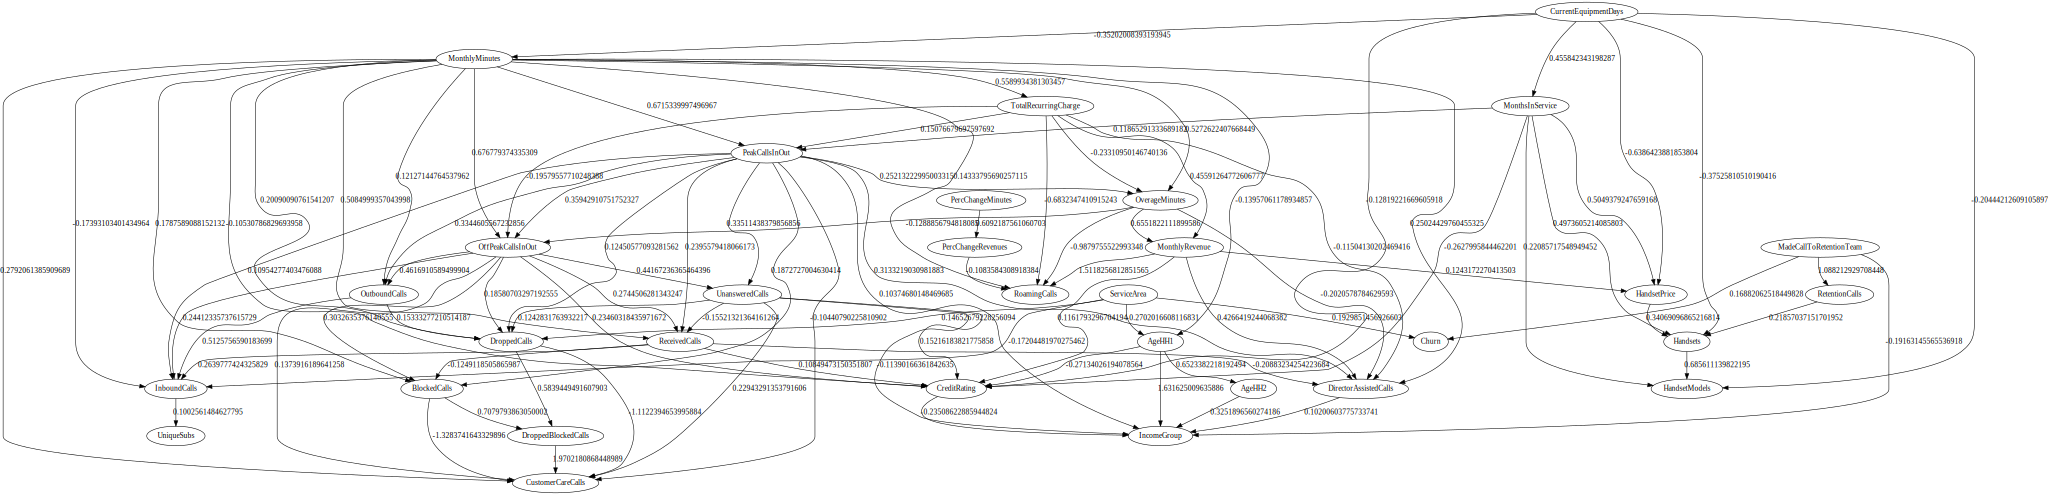

In [43]:
adjacency_matrix = model.adjacency_matrix_.copy()
adjacency_matrix[abs(adjacency_matrix) < 0.1] = 0
make_graph(adjacency_matrix, labels=labels)

In [72]:
#labels = [f'{col}' for i, col in enumerate(df.drop('MadeCallToRetentionTeam', axis=1).columns)]
#data = df.drop('MadeCallToRetentionTeam', axis=1).copy()
#data.RetentionCalls = data.RetentionCalls.apply(lambda x: 1 if x>0 else 0)
#data = data.to_numpy()
#model = lingam.ICALiNGAM()
#model.fit(data)

In [73]:
#adjacency_matrix = model.adjacency_matrix_.copy()
#adjacency_matrix[abs(adjacency_matrix) < 0.15] = 0
#make_graph(adjacency_matrix, labels=labels)

# Linear ATE

In [50]:
# oculto warnings:
warnings.filterwarnings("ignore")

# Obtain valid dot format
graph_dot = make_graph(model.adjacency_matrix_, labels=labels)

# Define Causal Model
causal_model = CausalModel(
        data = df,
        treatment='MadeCallToRetentionTeam',
        outcome='Churn',
        graph=str_to_dot(graph_dot.source)
        )

# Identification
identified_estimand = causal_model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

# Lineal Estimation
estimate = causal_model.estimate_effect(identified_estimand,
                                method_name="backdoor.linear_regression",
                                control_value=0,
                                treatment_value=1,
                                confidence_intervals=True,
                                test_significance=True)
print("Causal Estimate is " + str(estimate.value))

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
            d                       
──────────────────────────(E[Churn])
d[MadeCallToRetentionTeam]          
Estimand assumption 1, Unconfoundedness: If U→{MadeCallToRetentionTeam} and U→Churn then P(Churn|MadeCallToRetentionTeam,,U) = P(Churn|MadeCallToRetentionTeam,)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

linear_regression
{'control_value': 0, 'treatment_value': 1, 'test_significance': True, 'evaluate_effect_strength': False, 'confidence_intervals': True, 'target_units': 'ate', 'effect_modifiers': ['ServiceArea']}
{'treatment_value': 1, 'control_value': 0, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['ServiceArea']}
{'treatment_value': 1, 'control_value': 0, 'test_significance': False, 'evaluate_effect_

In [50]:
# oculto warnings:
warnings.filterwarnings("ignore")

# Obtain valid dot format
graph_dot = make_graph(model.adjacency_matrix_, labels=labels)

# Define Causal Model
causal_model = CausalModel(
        data = df,
        treatment='MadeCallToRetentionTeam',
        outcome='Churn',
        graph=str_to_dot(graph_dot.source)
        )

# Identification
identified_estimand = causal_model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

# Lineal Estimation
estimate = causal_model.estimate_effect(identified_estimand,
                                method_name="backdoor.linear_regression",
                                control_value=0,
                                treatment_value=1,
                                confidence_intervals=True,
                                test_significance=True)
print("Causal Estimate is " + str(estimate.value))

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
            d                       
──────────────────────────(E[Churn])
d[MadeCallToRetentionTeam]          
Estimand assumption 1, Unconfoundedness: If U→{MadeCallToRetentionTeam} and U→Churn then P(Churn|MadeCallToRetentionTeam,,U) = P(Churn|MadeCallToRetentionTeam,)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

linear_regression
{'control_value': 0, 'treatment_value': 1, 'test_significance': True, 'evaluate_effect_strength': False, 'confidence_intervals': True, 'target_units': 'ate', 'effect_modifiers': ['ServiceArea']}
{'treatment_value': 1, 'control_value': 0, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': ['ServiceArea']}
{'treatment_value': 1, 'control_value': 0, 'test_significance': False, 'evaluate_effect_

# Metalearners - Double Machine Learning

In [44]:
from sklearn.preprocessing import PolynomialFeatures
from lightgbm import LGBMRegressor
#from xgboost import XGBRegressor
#from sklearn.ensemble import RandomForestRegressor

In [52]:

dml_estimate = causal_model.estimate_effect(identified_estimand, method_name="backdoor.econml.dml.DML",
                                    control_value = 0,
                                    treatment_value = 1,
                                target_units = 1,  # condition used for CATE
                                confidence_intervals=False,
                                method_params={"init_params":{'model_y':LGBMRegressor(verbose=-1, max_depth=5),
                                                            'model_t': LGBMRegressor(verbose=-1, max_depth=5),
                                                            "model_final":LGBMRegressor(verbose=-1, max_depth=5),
                                                            'featurizer':PolynomialFeatures(degree=1, include_bias=False)},
                                            "fit_params":{}})
print(dml_estimate)

*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
            d                       
──────────────────────────(E[Churn])
d[MadeCallToRetentionTeam]          
Estimand assumption 1, Unconfoundedness: If U→{MadeCallToRetentionTeam} and U→Churn then P(Churn|MadeCallToRetentionTeam,,U) = P(Churn|MadeCallToRetentionTeam,)

## Realized estimand
b: Churn~MadeCallToRetentionTeam | ServiceArea
Target units: 

## Estimate
Mean value: 0.16616247673559476
Effect estimates: [0.162 0.017 0.425 ... 0.159 0.159 0.162]



In [53]:
%%time
dml_estimate = causal_model.estimate_effect(identified_estimand, method_name="backdoor.econml.dml.DML",
                                    control_value = 0,
                                    treatment_value = 1,
                                target_units = 1,  # condition used for CATE
                                confidence_intervals=False,
                                method_params={"init_params":{'model_y':LGBMRegressor(verbose=-1, max_depth=5),
                                                            'model_t': LGBMRegressor(verbose=-1, max_depth=5),
                                                            "model_final":LGBMRegressor(verbose=-1, max_depth=5),
                                                            'featurizer':PolynomialFeatures(degree=1, include_bias=False)},
                                            "fit_params":{}})
print(dml_estimate)

*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
            d                       
──────────────────────────(E[Churn])
d[MadeCallToRetentionTeam]          
Estimand assumption 1, Unconfoundedness: If U→{MadeCallToRetentionTeam} and U→Churn then P(Churn|MadeCallToRetentionTeam,,U) = P(Churn|MadeCallToRetentionTeam,)

## Realized estimand
b: Churn~MadeCallToRetentionTeam | ServiceArea
Target units: 

## Estimate
Mean value: 0.16845476779620117
Effect estimates: [0.219 0.148 0.304 ... 0.138 0.138 0.225]



In [54]:
%%time
dml_estimate = causal_model.estimate_effect(identified_estimand, method_name="backdoor.econml.dml.DML",
                                    control_value = 0,
                                    treatment_value = 1,
                                target_units = 1,  # condition used for CATE
                                confidence_intervals=False,
                                method_params={"init_params":{'model_y':LGBMRegressor(verbose=-1, max_depth=5),
                                                            'model_t': LGBMRegressor(verbose=-1, max_depth=5),
                                                            "model_final":LGBMRegressor(verbose=-1, max_depth=5),
                                                            'featurizer':PolynomialFeatures(degree=1, include_bias=False)},
                                            "fit_params":{}})
print(dml_estimate)

*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
            d                       
──────────────────────────(E[Churn])
d[MadeCallToRetentionTeam]          
Estimand assumption 1, Unconfoundedness: If U→{MadeCallToRetentionTeam} and U→Churn then P(Churn|MadeCallToRetentionTeam,,U) = P(Churn|MadeCallToRetentionTeam,)

## Realized estimand
b: Churn~MadeCallToRetentionTeam | ServiceArea
Target units: 

## Estimate
Mean value: 0.23990045491355658
Effect estimates: [0.162 0.166 0.27  ... 0.279 0.279 0.279]



In [45]:
from econml.inference import BootstrapInference

In [57]:
%%time
dml_estimate = causal_model.estimate_effect(identified_estimand,
                                    method_name="backdoor.econml.dml.DML",
                                    target_units = "ate",
                                    confidence_intervals=True,
                                    method_params={"init_params":{'model_y':LGBMRegressor(verbose=-1),
                                                            'model_t': LGBMRegressor(verbose=-1),
                                                            "model_final": LGBMRegressor(verbose=-1),
                                                            'featurizer':PolynomialFeatures(degree=1, include_bias=True)},
                                            "fit_params":{
                                                            'inference': BootstrapInference(n_bootstrap_samples=100, n_jobs=-1),
                                                            }
                                            })
print(dml_estimate)

*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
            d                       
──────────────────────────(E[Churn])
d[MadeCallToRetentionTeam]          
Estimand assumption 1, Unconfoundedness: If U→{MadeCallToRetentionTeam} and U→Churn then P(Churn|MadeCallToRetentionTeam,,U) = P(Churn|MadeCallToRetentionTeam,)

## Realized estimand
b: Churn~MadeCallToRetentionTeam | ServiceArea
Target units: ate

## Estimate
Mean value: 0.17306053361987644
Effect estimates: [0.177 0.273 0.273 ... 0.123 0.123 0.205]
95.0% confidence interval: (array([ 0.012,  0.193,  0.088, ..., -0.129, -0.129,  0.058]), array([0.483, 0.741, 0.502, ..., 0.361, 0.341, 0.552]))



In [58]:
dml_estimate.get_confidence_intervals()[0].mean(), dml_estimate.get_confidence_intervals()[1].mean()

In [69]:
np.mean(dml_estimate.get_confidence_intervals()[0].mean(), dml_estimate.get_confidence_intervals()[1].mean())

In [68]:
np.median(dml_estimate.get_confidence_intervals()[0]), np.median(dml_estimate.get_confidence_intervals()[1])

# Binary Metalearners

In [46]:
import statsmodels.api as statm

In [65]:
# Identification
identified_estimand_binary = causal_model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand_binary)

# Lineal Estimation
estimate = causal_model.estimate_effect(identified_estimand,
                                method_name="backdoor.generalized_linear_model",
                                control_value=0,
                                treatment_value=1,
                                confidence_intervals=True,
                                test_significance=True,
                                method_params = {
                                            'num_null_simulations':10,
                                            'num_simulations':10,
                                            'num_quantiles_to_discretize_cont_cols':10,
                                            'fit_method': "statsmodels",
                                            'glm_family': statm.families.Binomial(), # logistic regression
                                            'need_conditional_estimates':False
                                        })
print("Causal Estimate is " + str(estimate.value))

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
            d                       
──────────────────────────(E[Churn])
d[MadeCallToRetentionTeam]          
Estimand assumption 1, Unconfoundedness: If U→{MadeCallToRetentionTeam} and U→Churn then P(Churn|MadeCallToRetentionTeam,,U) = P(Churn|MadeCallToRetentionTeam,)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

generalized_linear_model
Causal Estimate is 0.1686970630179977


In [47]:
from lightgbm import LGBMClassifier

In [52]:
identified_estimand_binary = causal_model.identify_effect(proceed_when_unidentifiable=True)

In [60]:
%%time
drlearner_estimate = causal_model.estimate_effect(identified_estimand_binary,
                                method_name="backdoor.econml.dr.LinearDRLearner",
                                confidence_intervals=False,
                                method_params={"init_params":{
                                                'model_propensity': LGBMClassifier(verbose=-1, max_depth=5),
                                                },
                                        "fit_params":{}
                                        })
print(drlearner_estimate)

*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
            d                       
──────────────────────────(E[Churn])
d[MadeCallToRetentionTeam]          
Estimand assumption 1, Unconfoundedness: If U→{MadeCallToRetentionTeam} and U→Churn then P(Churn|MadeCallToRetentionTeam,,U) = P(Churn|MadeCallToRetentionTeam,)

## Realized estimand
b: Churn~MadeCallToRetentionTeam | ServiceArea
Target units: ate

## Estimate
Mean value: 0.2426893094933194
Effect estimates: [-0.252  0.384  0.586 ...  0.137  0.188  0.053]



In [62]:
%%time
drlearner_estimate = causal_model.estimate_effect(identified_estimand_binary,
                                method_name="backdoor.econml.dr.LinearDRLearner",
                                confidence_intervals=True,
                                method_params={"init_params":{
                                                'model_propensity': LGBMClassifier(verbose=-1, max_depth=5),
                                                },
                                        "fit_params":{
                                                        'inference': BootstrapInference(n_bootstrap_samples=100, n_jobs=-1),
                                                        }
                                        })
print(drlearner_estimate)

*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
            d                       
──────────────────────────(E[Churn])
d[MadeCallToRetentionTeam]          
Estimand assumption 1, Unconfoundedness: If U→{MadeCallToRetentionTeam} and U→Churn then P(Churn|MadeCallToRetentionTeam,,U) = P(Churn|MadeCallToRetentionTeam,)

## Realized estimand
b: Churn~MadeCallToRetentionTeam | ServiceArea
Target units: ate

## Estimate
Mean value: 0.2127551401751179
Effect estimates: [-0.117  0.307  0.442 ...  0.142  0.176  0.087]
95.0% confidence interval: (array([-0.412,  0.257,  0.363, ...,  0.079,  0.127, -0.01 ]), array([-0.063,  0.459,  0.716, ...,  0.164,  0.215,  0.104]))



In [63]:
drlearner_estimate.get_confidence_intervals()[0].mean(), drlearner_estimate.get_confidence_intervals()[1].mean()

In [100]:
metalearner_estimate = causal_model.estimate_effect(identified_estimand_binary,
                            method_name="backdoor.econml.metalearners.TLearner",
                            confidence_intervals=False,
                            method_params={"init_params":{
                                                'models': LGBMRegressor(verbose=-1, max_depth=5),
                                                },
                                        "fit_params":{
                                                    }
                                            })
print(metalearner_estimate)

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
            d                       
──────────────────────────(E[Churn])
d[MadeCallToRetentionTeam]          
Estimand assumption 1, Unconfoundedness: If U→{MadeCallToRetentionTeam} and U→Churn then P(Churn|MadeCallToRetentionTeam,,U) = P(Churn|MadeCallToRetentionTeam,)

## Realized estimand
b: Churn~MadeCallToRetentionTeam+ServiceArea
Target units: ate

## Estimate
Mean value: 0.1756006929179102
Effect estimates: [[0.43 ]
 [0.07 ]
 [0.063]
 ...
 [0.124]
 [0.242]
 [0.242]]



In [53]:
%%time
Xlearner_estimate = causal_model.estimate_effect(identified_estimand_binary,
                                method_name="backdoor.econml.metalearners.XLearner",
                                confidence_intervals=True,
                                method_params={"init_params":{
                                                'models': LGBMRegressor(verbose=-1, max_depth=5),
                                                },
                                        "fit_params":{
                                                        'inference': BootstrapInference(n_bootstrap_samples=100, n_jobs=-1),
                                                        }
                                                })
print(Xlearner_estimate)

*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
            d                       
──────────────────────────(E[Churn])
d[MadeCallToRetentionTeam]          
Estimand assumption 1, Unconfoundedness: If U→{MadeCallToRetentionTeam} and U→Churn then P(Churn|MadeCallToRetentionTeam,,U) = P(Churn|MadeCallToRetentionTeam,)

## Realized estimand
b: Churn~MadeCallToRetentionTeam+ServiceArea
Target units: ate

## Estimate
Mean value: 0.16881284633583443
Effect estimates: [0.324 0.118 0.048 ... 0.164 0.242 0.193]
95.0% confidence interval: (array([ 0.168, -0.03 , -0.198, ..., -0.03 ,  0.071,  0.032]), array([0.503, 0.252, 0.195, ..., 0.278, 0.36 , 0.399]))

CPU times: total: 3min 8s
Wall time: 50.1 s


In [54]:
Xlearner_estimate.get_confidence_intervals()[0].mean(), Xlearner_estimate.get_confidence_intervals()[1].mean()

In [60]:
Xlearner_estimate.cate_estimates.shape

In [62]:
df['CATE'] = Xlearner_estimate.cate_estimates

In [87]:
X_cate = df.drop('Churn', axis=1)
y_cate = df['Churn']

In [70]:
del_vars = deleted_features.tolist() + ['HandsetModels','DroppedCalls','BlockedCalls','ReceivedCalls', 'OffPeakCallsInOut']

In [71]:
from functools import partial

In [72]:
feat_sel = partial(feature_selection, add=del_vars)

In [88]:
# importo train_test_split
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier

In [89]:
# Separo en train y val
X_train, X_val, y_train, y_val = train_test_split(X_cate, y_cate, test_size=0.3, random_state=SEED, stratify=y_cate)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

In [90]:
display(X_train.MadeCallToRetentionTeam.value_counts(normalize=True), X_val.MadeCallToRetentionTeam.value_counts(normalize=True))

MadeCallToRetentionTeam
0.0    0.966417
1.0    0.033583
Name: proportion, dtype: float64

MadeCallToRetentionTeam
0.0    0.964414
1.0    0.035586
Name: proportion, dtype: float64

In [91]:
%%time

lgbm = LGBMClassifier(n_estimators=500
                    ,learning_rate=0.1
                    ,max_depth=10
                    ,random_state=SEED
                    ,n_jobs=-1
                    ,verbose=-1)

lgbm.fit(X_train, y_train)

CPU times: total: 8.95 s
Wall time: 2.47 s


LGBMClassifier(max_depth=10, n_estimators=500, n_jobs=-1, random_state=10,
               verbose=-1)

In [92]:
y_pred_lgbm = lgbm.predict(X_val)

In [93]:
fr.metrics_summ(y_val, y_pred_lgbm)


Accuracy: 0.72151
Balanced Accuracy: 0.56191
F2 score: 0.21342
F1 score: 0.27700
Precision: 0.55017
Recall: 0.18509

Confusion Matrix:
[[10233   668]
 [ 3597   817]]


In [94]:
y_pred_proba_lgbm = lgbm.predict_proba(X_val)[:,1]

In [95]:
df_aux = pd.concat([pd.Series(y_pred_proba_lgbm), pd.Series(y_val.reset_index(drop=True))], axis=1).rename(columns={0:'y_pred_proba', 'Churn':'y_true'})

In [96]:
df_aux.describe()

,y_pred_proba,y_true
count,15315.000000,15315.000000
mean,0.278878,0.288214
std,0.160381,0.452946
min,0.007873,0.000000
25%,0.157784,0.000000
50%,0.255044,0.000000
75%,0.370303,1.000000
max,0.970079,1.000000


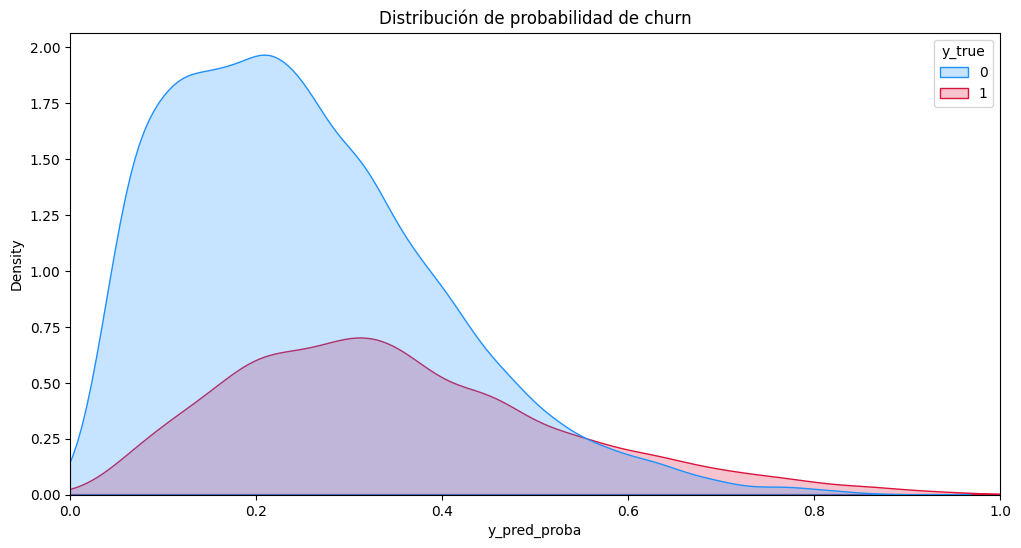

In [97]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.kdeplot(data=df_aux, x='y_pred_proba', hue='y_true', ax=ax, fill=True, palette=['dodgerblue','crimson'])
ax.set_title('Distribución de probabilidad de churn')
ax.set_xlim(0,1)
plt.show()

In [99]:
df_aux['CATE'] = X_val['CATE'].copy().reset_index(drop=True)
df_aux

,y_pred_proba,y_true,CATE
0,0.196919,0,0.178927
1,0.389022,0,0.296658
2,0.065806,0,0.267755
3,0.193501,0,0.208388
4,0.100298,1,0.239723
...,...,...,...
15310,0.267315,0,0.265403
15311,0.330502,0,0.071772
15312,0.377881,0,0.273847
15313,0.503230,0,0.229402


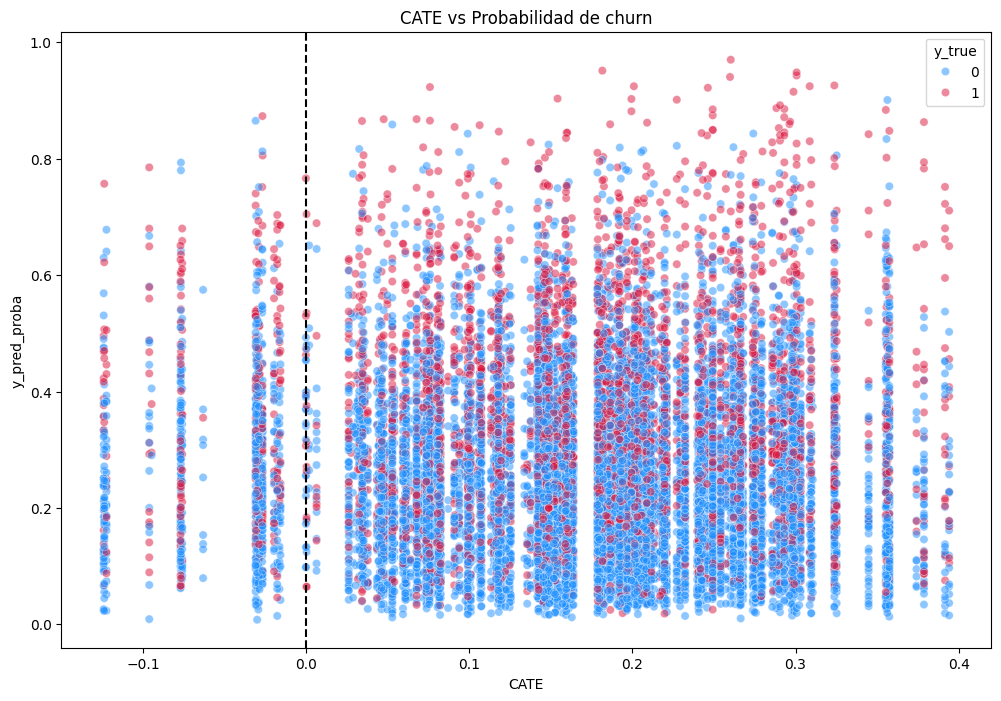

In [110]:
fig, ax = plt.subplots(figsize=(12,8))
sns.scatterplot(data=df_aux, x='CATE', y='y_pred_proba', ax=ax, hue='y_true', palette={0:'dodgerblue',1:'crimson'}, alpha=0.5)
ax.set_title('CATE vs Probabilidad de churn')
ax.axvline(0, color='black', linestyle='--')
plt.show()